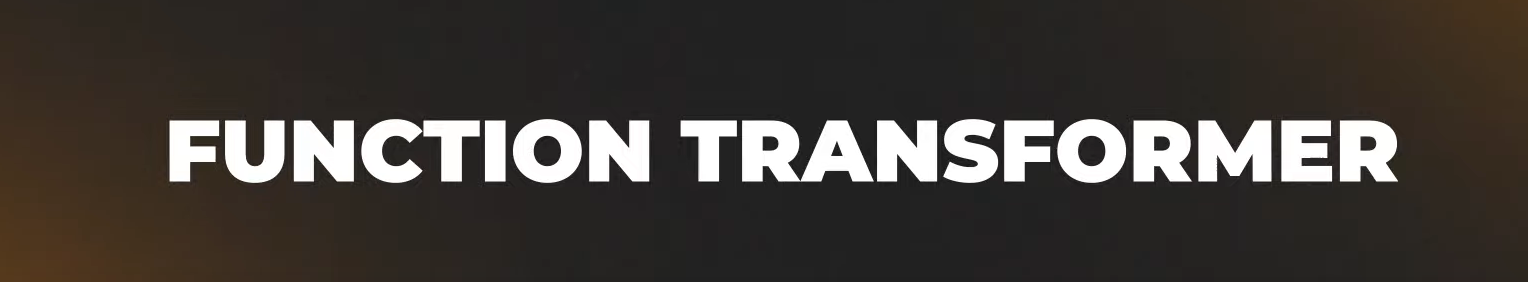

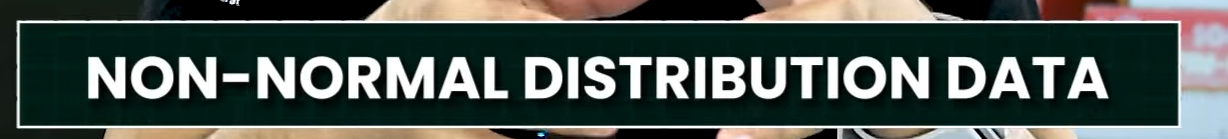

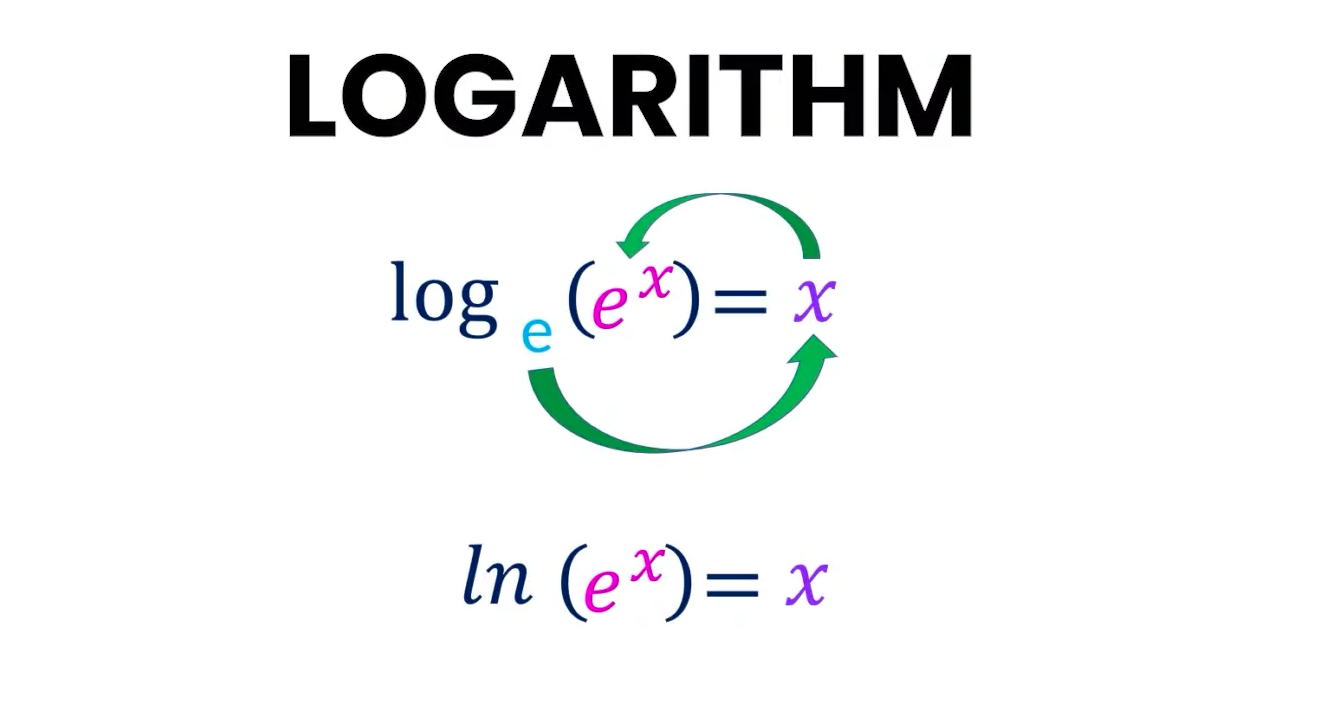

In [1]:
# Importing the Pandas library as pd
import pandas as pd

# Importing the Seaborn library as sns
import seaborn as sns

# Importing the numpy library as np
import numpy as np 

# Importing the Matplotlib library for plotting
import matplotlib.pyplot as plt

# Reading the CSV file "loan.csv" into a DataFrame named df
df = pd.read_csv("loan.csv")

# Displaying the first three rows of the DataFrame
df.head(3)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [2]:
df_with_outlier = df

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

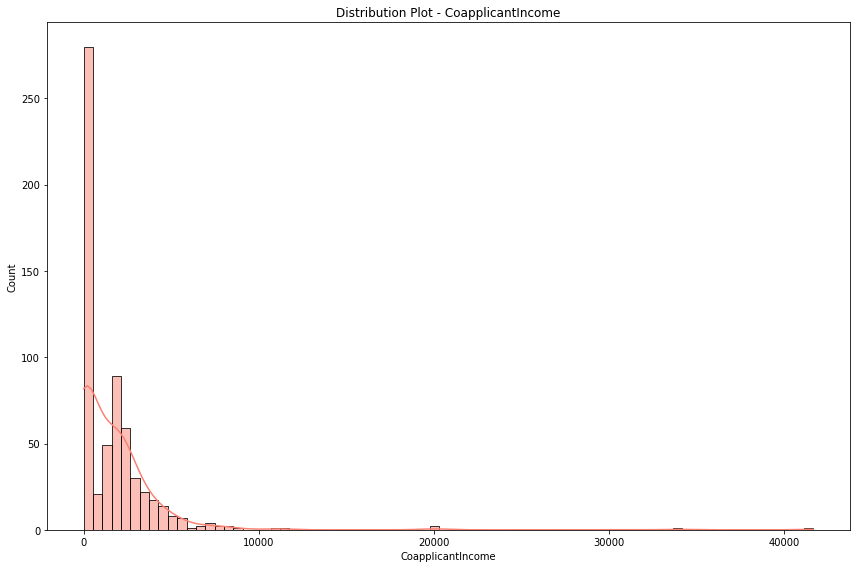

In [4]:
# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Distribution plot for the "CoapplicantIncome" column
sns.histplot(df["CoapplicantIncome"], kde=True, color="salmon", ax=ax)

# Set title for the plot
ax.set_title("Distribution Plot - CoapplicantIncome")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()




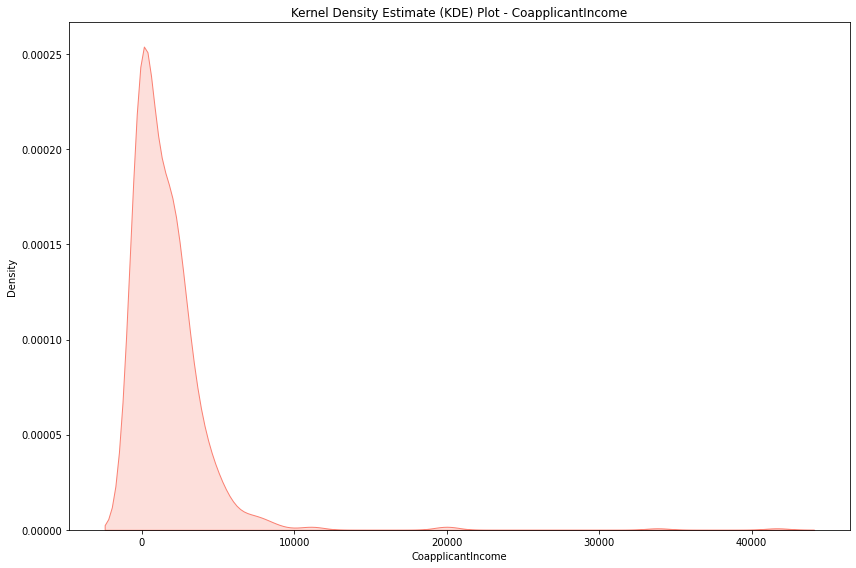

In [5]:
# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# KDE plot for the "CoapplicantIncome" column
sns.kdeplot(df["CoapplicantIncome"], color="salmon", fill=True, ax=ax)

# Set title for the plot
ax.set_title("Kernel Density Estimate (KDE) Plot - CoapplicantIncome")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


<ipython-input-6-bd42a6d35395>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"], color="salmon", ax=ax)


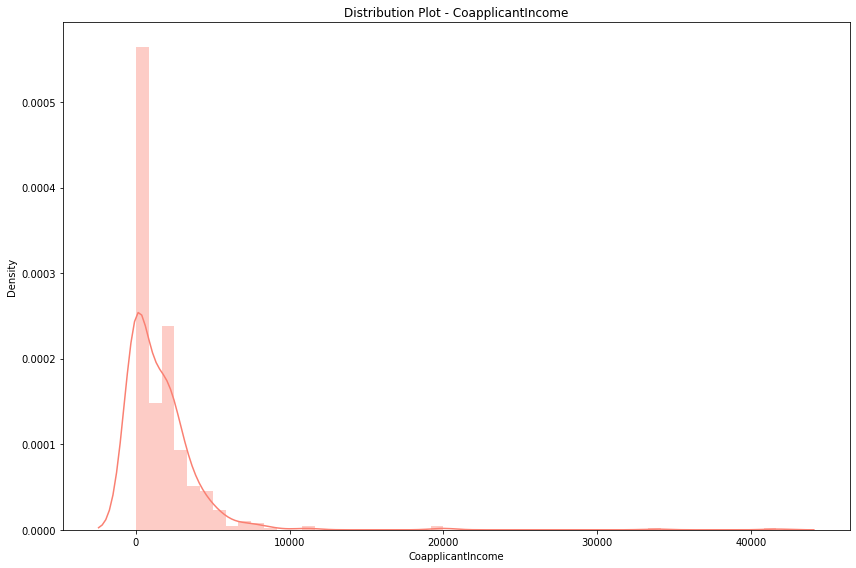

In [6]:
# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Simple distribution plot for the "CoapplicantIncome" column
sns.distplot(df["CoapplicantIncome"], color="salmon", ax=ax)

# Set title for the plot
ax.set_title("Distribution Plot - CoapplicantIncome")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [7]:
# Calculate the first quartile (Q1) of CoapplicantIncome
q1 = df["CoapplicantIncome"].quantile(0.25)

# Calculate the third quartile (Q3) of CoapplicantIncome
q3 = df["CoapplicantIncome"].quantile(0.75)

# Calculate the interquartile range (IQR) of CoapplicantIncome
iqr = q3 - q1


In [8]:
# Calculate the minimum and maximum range for identifying potential outliers
min_range = q1 - (1.5 * iqr)
max_range = q1 + (1.5 * iqr)

In [9]:
# Print the minimum and maximum range for identifying potential outliers
print(f"Minimum Range: {min_range}, Maximum Range: {max_range}")


Minimum Range: -3445.875, Maximum Range: 3445.875


In [10]:
# Filter the DataFrame to exclude rows where CoapplicantIncome is greater than max_range
df = df[df["CoapplicantIncome"] <= max_range]


<ipython-input-11-bd42a6d35395>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"], color="salmon", ax=ax)


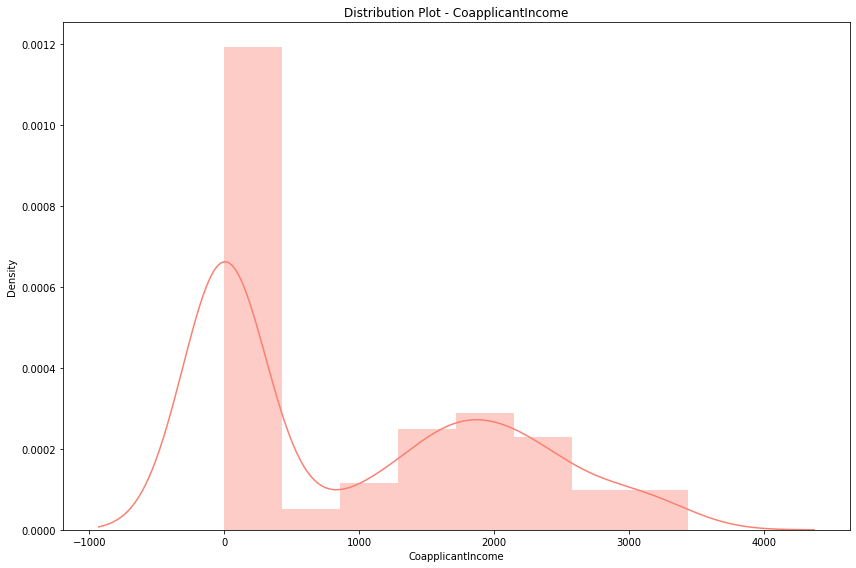

In [11]:
# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Simple distribution plot for the "CoapplicantIncome" column
sns.distplot(df["CoapplicantIncome"], color="salmon", ax=ax)

# Set title for the plot
ax.set_title("Distribution Plot - CoapplicantIncome")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [12]:
from sklearn.preprocessing import FunctionTransformer


In [13]:
ft = FunctionTransformer(func=np.log1p)


In [14]:
ft.fit(df[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [15]:
df["CoapplicantIncome_TF"] = ft.transform(df[["CoapplicantIncome"]])

<ipython-input-15-8fc706a0bc1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CoapplicantIncome_TF"] = ft.transform(df[["CoapplicantIncome"]])


In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_TF
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.765993
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000


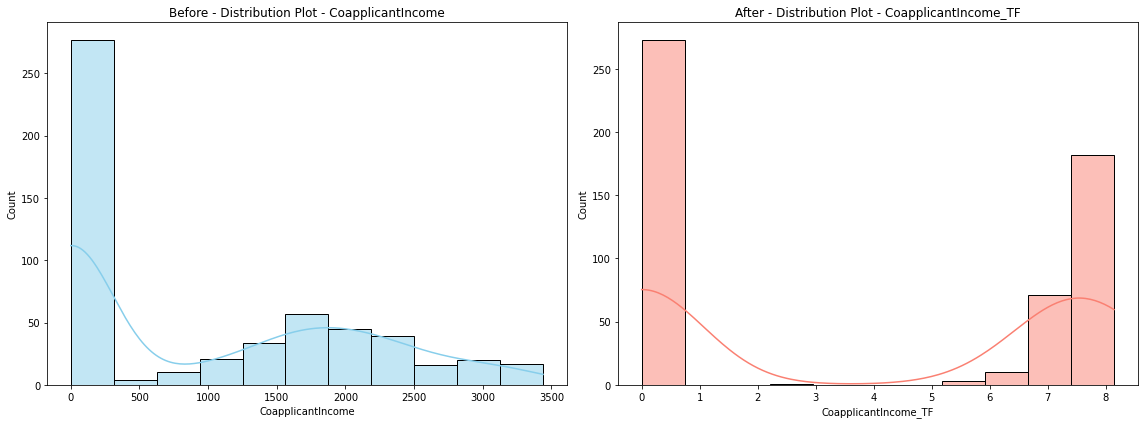

In [17]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribution plot for the "CoapplicantIncome" column with a different color
sns.histplot(df["CoapplicantIncome"], ax=axes[0], kde=True, color="skyblue")
axes[0].set_title("Before - Distribution Plot - CoapplicantIncome")

# Distribution plot for the "CoapplicantIncome_TF" column with a different color
sns.histplot(df["CoapplicantIncome_TF"], ax=axes[1], kde=True, color="salmon")
axes[1].set_title("After - Distribution Plot - CoapplicantIncome_TF")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


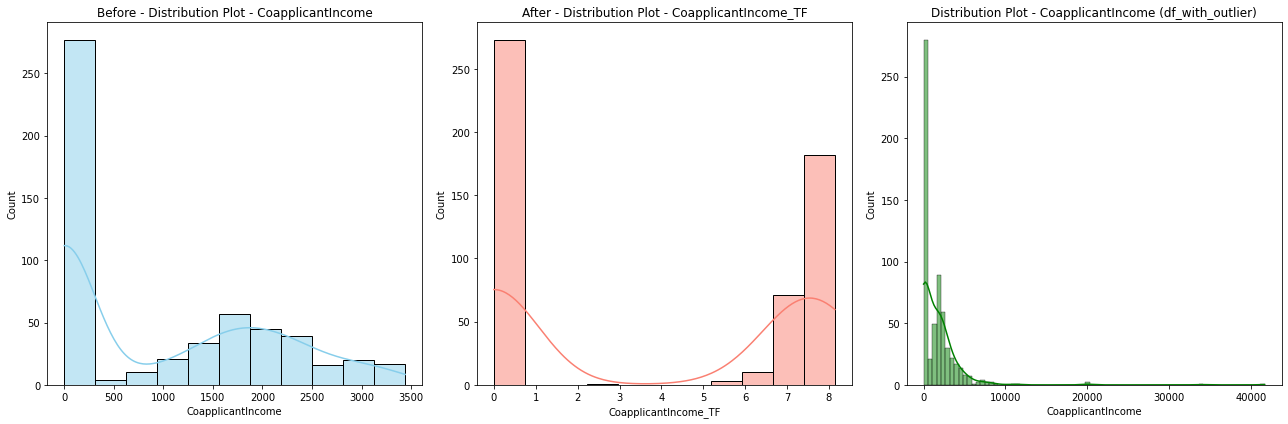

In [18]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Distribution plot for the "CoapplicantIncome" column with a different color
sns.histplot(df["CoapplicantIncome"], ax=axes[0], kde=True, color="skyblue")
axes[0].set_title("Before - Distribution Plot - CoapplicantIncome")

# Distribution plot for the "CoapplicantIncome_TF" column with a different color
sns.histplot(df["CoapplicantIncome_TF"], ax=axes[1], kde=True, color="salmon")
axes[1].set_title("After - Distribution Plot - CoapplicantIncome_TF")

# Distribution plot for the "CoapplicantIncome" column in df_with_outlier with a different color
sns.histplot(df_with_outlier["CoapplicantIncome"], ax=axes[2], kde=True, color="green")
axes[2].set_title("Distribution Plot - CoapplicantIncome (df_with_outlier)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [19]:
from sklearn.preprocessing import FunctionTransformer

# Assuming you want to transform the "CoapplicantIncome" column using a quadratic function
ft1 = FunctionTransformer(func=lambda x: x**2)
ft1.fit(df[["CoapplicantIncome"]])
df["CoapplicantIncome_TF1"] = ft1.transform(df[["CoapplicantIncome"]])


<ipython-input-19-c1b625cca540>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CoapplicantIncome_TF1"] = ft1.transform(df[["CoapplicantIncome"]])


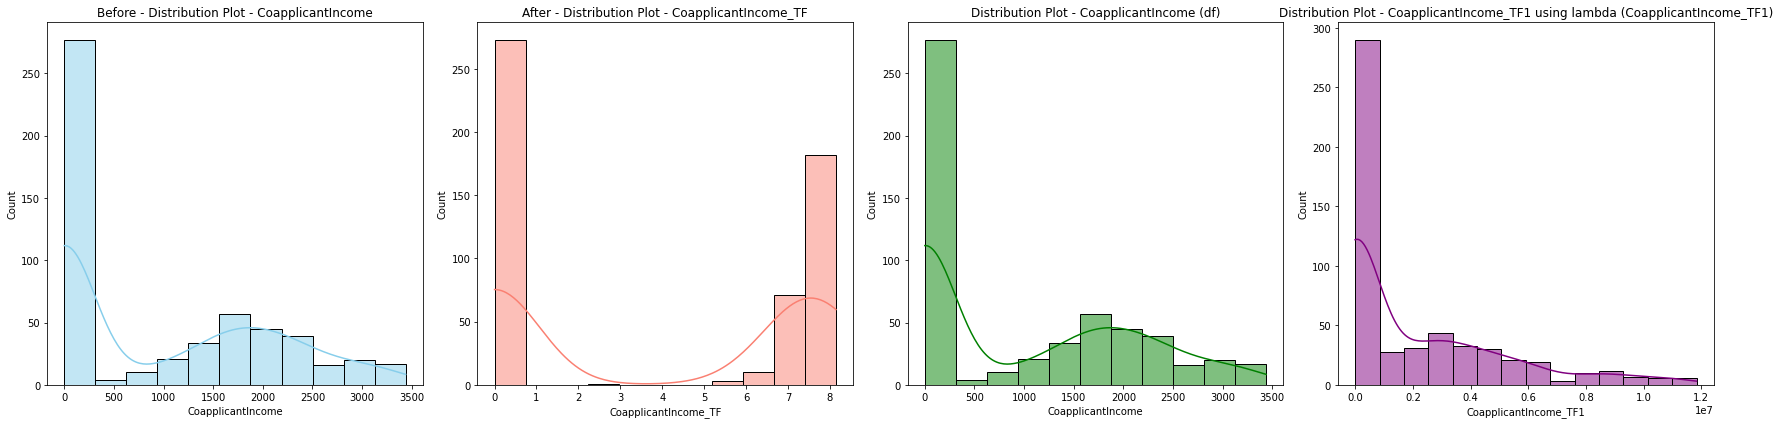

In [21]:
# Create subplots with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Distribution plot for the "CoapplicantIncome" column with a different color
sns.histplot(df["CoapplicantIncome"], ax=axes[0], kde=True, color="skyblue")
axes[0].set_title("Before - Distribution Plot - CoapplicantIncome")

# Distribution plot for the "CoapplicantIncome_TF" column with a different color
sns.histplot(df["CoapplicantIncome_TF"], ax=axes[1], kde=True, color="salmon")
axes[1].set_title("After - Distribution Plot - CoapplicantIncome_TF")

# Distribution plot for the "CoapplicantIncome" column with a different color
sns.histplot(df["CoapplicantIncome"], ax=axes[2], kde=True, color="green")
axes[2].set_title("Distribution Plot - CoapplicantIncome (df)")


# Distribution plot for the "CoapplicantIncome_TF1" column using lambda in df with a different color
sns.histplot(df["CoapplicantIncome_TF1"], ax=axes[3], kde=True, color="purple")
axes[3].set_title("Distribution Plot - CoapplicantIncome_TF1 using lambda (CoapplicantIncome_TF1)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
